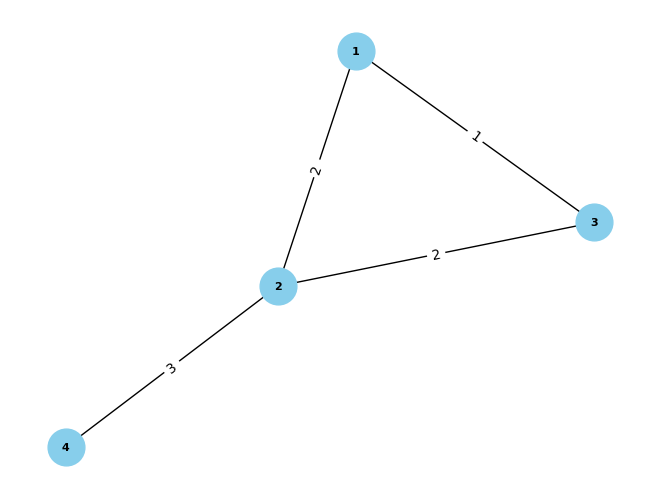

In [67]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Create a graph with 10 nodes
G = nx.Graph()

# Add nodes to the graph
nodes = 4

G.add_nodes_from(range(1, nodes))
G.add_edge(1, 2, weight=2)
G.add_edge(1, 3, weight=1)
G.add_edge(3, 2, weight=2)
G.add_edge(2, 4, weight=3)

# Plot the graph with weights
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)

# Add edge labels with weights
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

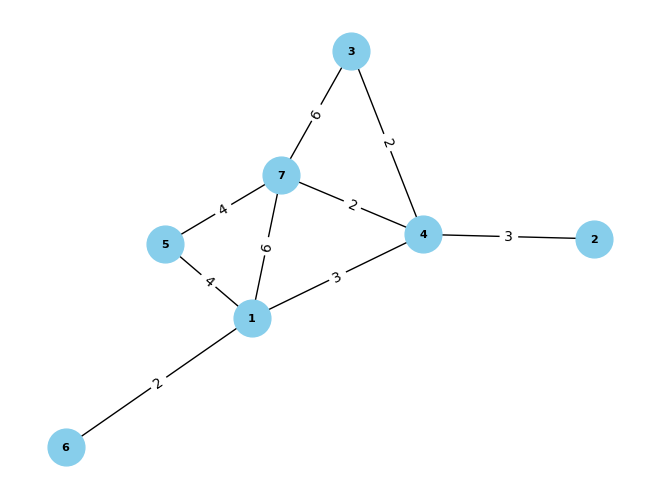

In [147]:
# Create a graph with 10 nodes
G = nx.Graph()

# Add nodes to the graph
nodes = 8

G.add_nodes_from(range(1, nodes))
G.add_edge(2, 4, weight=3)
G.add_edge(4, 3, weight=2)
G.add_edge(3, 7, weight=6)
G.add_edge(7, 1, weight=6)
G.add_edge(7, 4, weight=2)
G.add_edge(7, 5, weight=4)
G.add_edge(1, 6, weight=2)
G.add_edge(5, 1, weight=4)
G.add_edge(4, 1, weight=3)

# Plot the graph with weights
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)

# Add edge labels with weights
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

## 1. Weight matrix

In [148]:
def infection_matrix(net):
    
    num_nodes = len(net.nodes())
    infection_array = np.zeros((num_nodes, num_nodes), dtype=float)
                
    return infection_array


def update_time(times_matrix, seed_node):
    
    values = 0
    track = np.array([seed_node - 1])
    
    # What was the min value of the arrange greater than 0 (it-self)--> faster transmission
    indeces = np.where(times_matrix[(seed_node - 1), :] >= 1)
    values = times_matrix[(seed_node - 1), indeces]

    # Check if any new number is not in the existing array
    new_numbers = np.setdiff1d(indeces[0], track)
    track = np.concatenate((track, new_numbers))

    # Update the infection time
    for v, k in zip(values[0], track[1:]):
        
        update = times_matrix[k, :]
        update[update > 0] += v

        # Add the update
        times_matrix[k, :] = update

        # Update indeces and values for the next iteration
        indeces = np.where(times_matrix[k, :] >= 1)
        values = times_matrix[k, indeces]

        # Check if any new number is not in the existing array THE NODE == INDEX
        new_numbers = np.setdiff1d(indeces[0], track)
        #print("new_numbers ROW", new_numbers)

        if new_numbers.size > 0:
            v = times_matrix[k, new_numbers]

            update = times_matrix[new_numbers, :]
            update[update > 0] += v[0]
            # Add the update
            times_matrix[new_numbers, :] = update

            # Concatenate values and times_matrix[k, new_numbers]
            track = np.concatenate((track, new_numbers))

    return track  

def infection(f, track, prob_array, infect_array):
    p = f
    infection_row = np.where(prob_array[track[0], :] >= p, 1, 0)
    infect_array[track[0],:] = infection_row

    for i in infection_row[1:]: # 1, 0, 0, 0
        if i == 1:
            for j in track[1:]: # ..., 1, 1
                infect_row = np.where(prob_array[j, :] >= p, 1, 0)
                infect_array[j,:] = infect_row

                cols = np.where(infect_array[j,:] == 1)
                
                # Check if any new number is not in the existing array
                new_numbers = np.setdiff1d(cols, track)

                # Append the new numbers to the existing array
                track = np.append(track, new_numbers)
        else:
            pass

    return infect_array     


def update_time_prob(times_matrix, infection_matrix, seed_node):
    
    times_matrix = times_matrix * infection_matrix
    
    values = 0
    track = np.array([seed_node - 1])
    
    # What was the min value of the arrange greater than 0 (it-self)--> faster transmission
    indeces = np.where(times_matrix[(seed_node - 1), :] >= 1)
    values = times_matrix[(seed_node - 1), indeces]

    # Check if any new number is not in the existing array
    new_numbers = np.setdiff1d(indeces[0], track)
    track = np.concatenate((track, new_numbers))

    #print("GO INSIDE")
    # Update the infection time
    for v, k in zip(values[0], track[1:]):
        
        update = times_matrix[k, :]
        update[update > 0] += v

        # Add the update
        times_matrix[k, :] = update

        # Update indeces and values for the next iteration
        indeces = np.where(times_matrix[k, :] >= 1)
        values = times_matrix[k, indeces]

        # Check if any new number is not in the existing array THE NODE == INDEX
        new_numbers = np.setdiff1d(indeces[0], track)
        #print("new_numbers ROW", new_numbers)

        if new_numbers.size > 0:
            #print("value ", times_matrix[k, new_numbers])  # aca el Value
            v = times_matrix[k, new_numbers]

            update = times_matrix[new_numbers, :]
            update[update > 0] += v[0]
            # Add the update
            times_matrix[new_numbers, :] = update

            # Concatenate values and times_matrix[k, new_numbers]
            track = np.concatenate((track, new_numbers))
            
    accumulated_sums = {}

    # Initialize accumulated sum variable
    accumulated_sum = 0

    # Iterate through the shortest path lengths
    for node, distance in shortest_paths.items():
        # Add the distance to the accumulated sum
        accumulated_sum += distance

        # Store the accumulated sum in the dictionary
        accumulated_sums[node] = accumulated_sum
        
        
    return times_matrix, track, accumulated_sums    

def match_array_lengths(arr1, arr2):
    len1, len2 = len(arr1), len(arr2)

    if len1 != len2:
        # Resize arr2 to match the length of arr1
        arr2 = np.resize(arr2, len1)

    return arr1, arr2


In [149]:
weight_array = nx.adjacency_matrix(G, weight='weight').todense()
np.random.seed(41)
nod_numbers = len(G.nodes())
probabilities = np.round(np.random.rand(nod_numbers, nod_numbers), decimals=2)
prob_array = np.where(weight_array > 0, probabilities, 0)

seed_node = 4
times_matrix = nx.adjacency_matrix(G, weight='weight').todense()
shortest_paths = nx.shortest_path_length(G, source=seed_node, weight='weight')

infect_array = infection_matrix(G)
print(infect_array)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


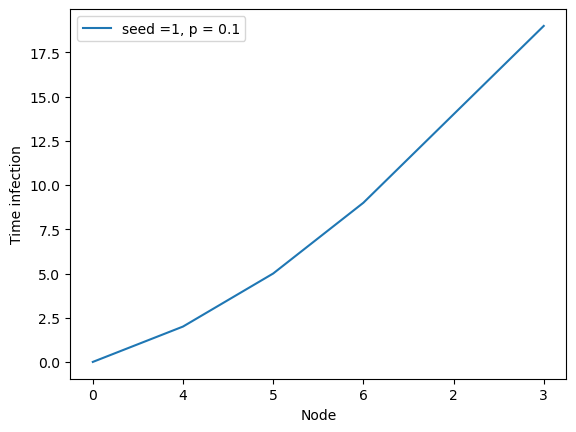

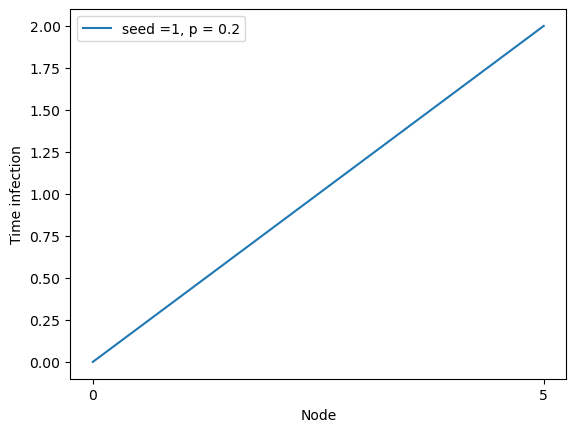

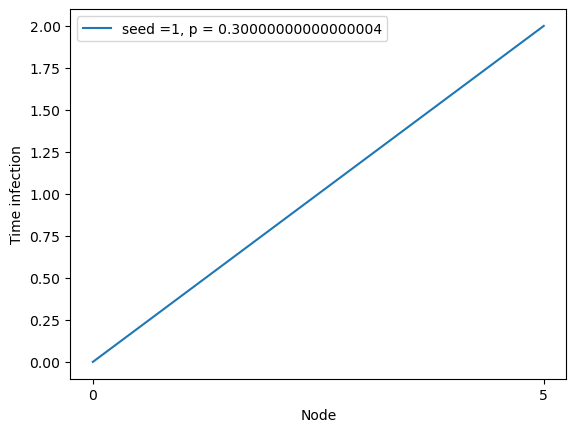

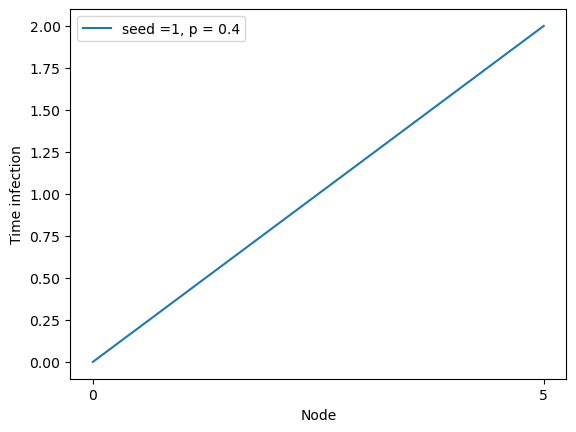

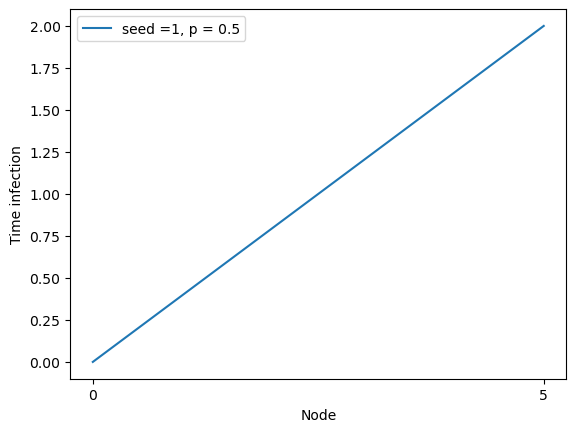

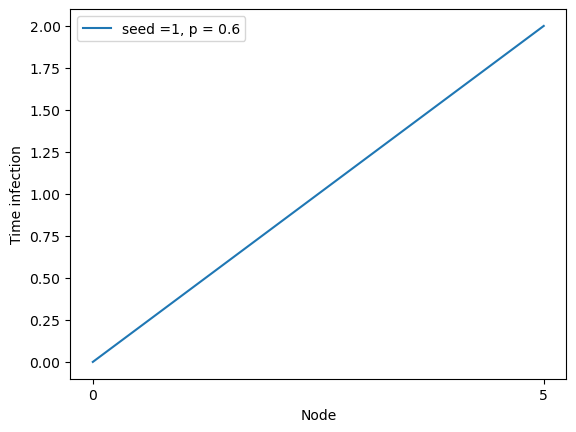

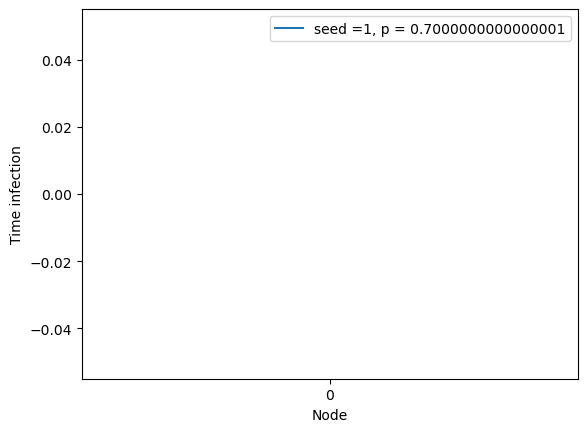

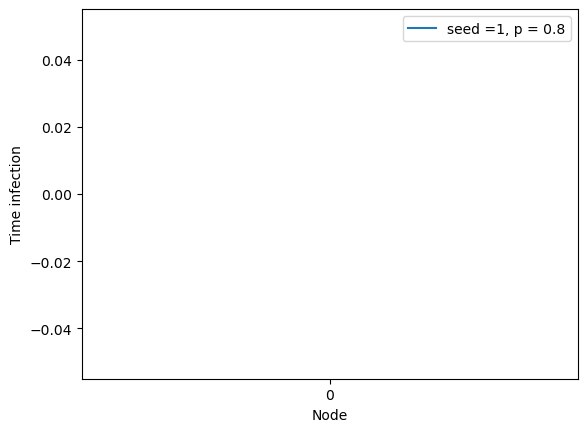

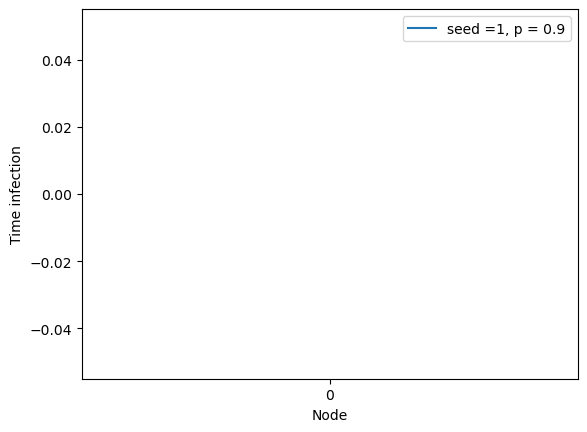

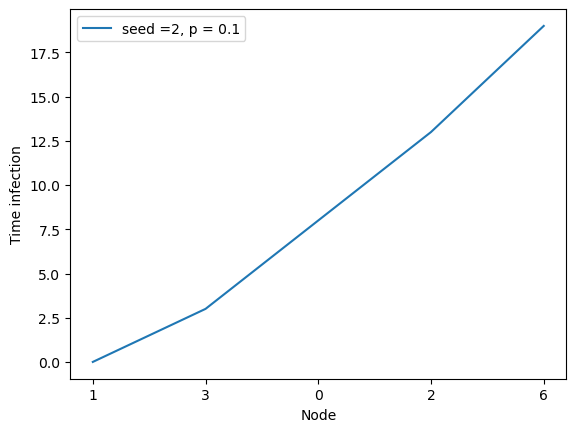

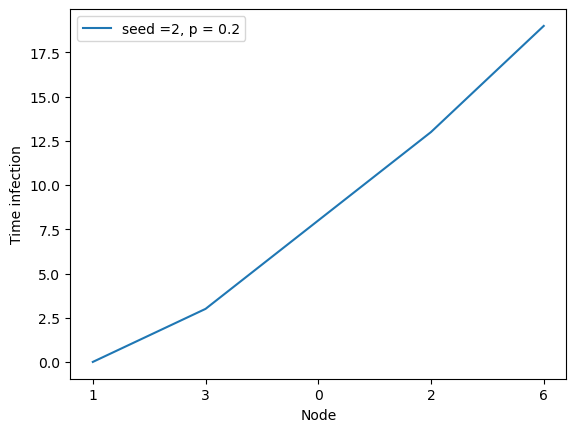

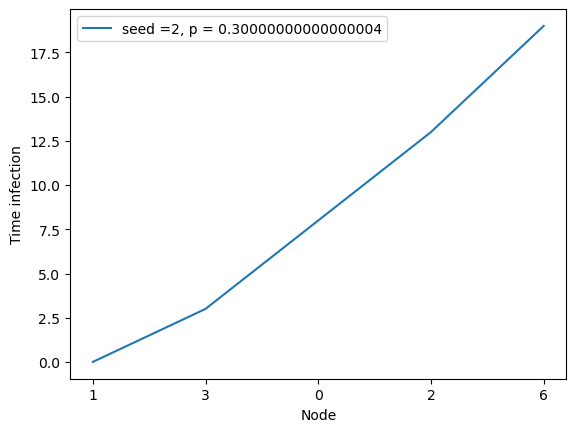

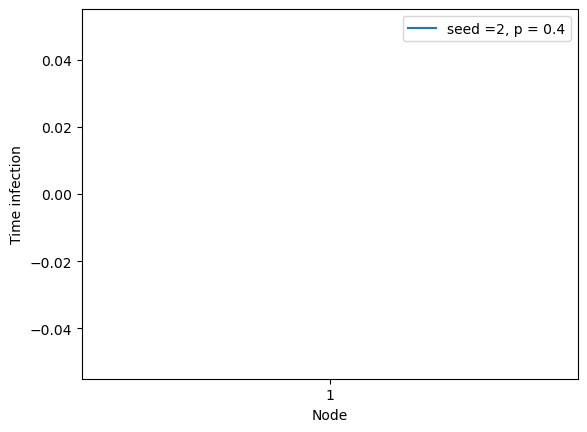

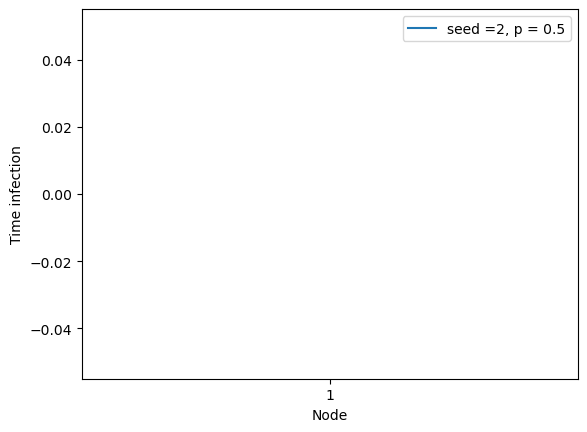

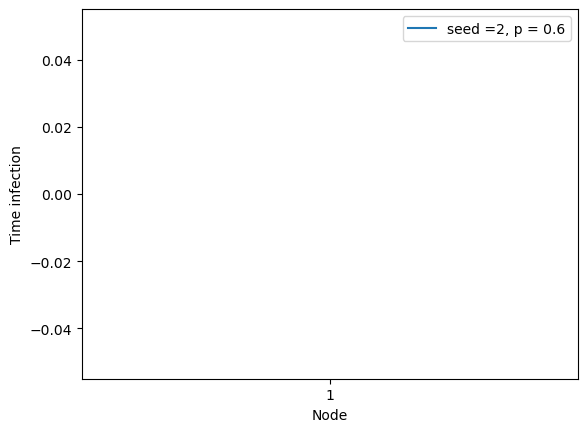

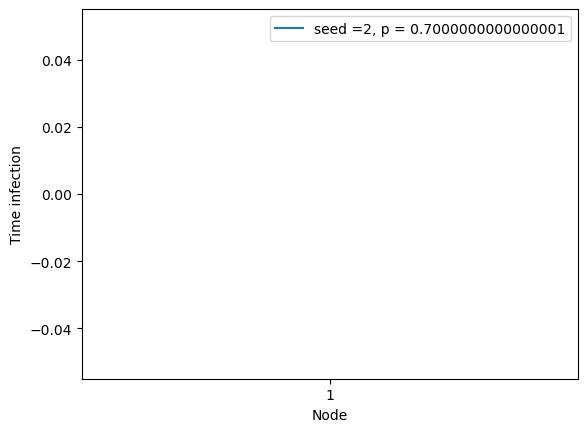

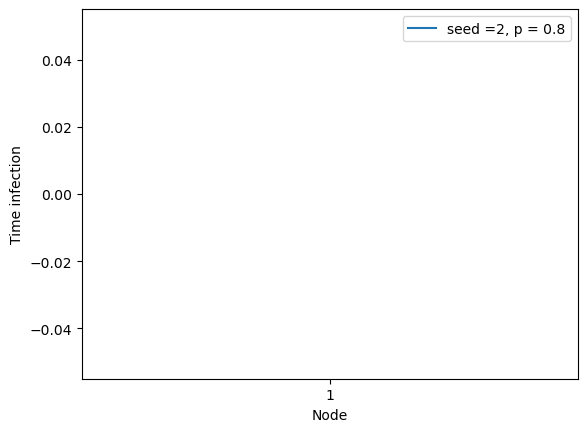

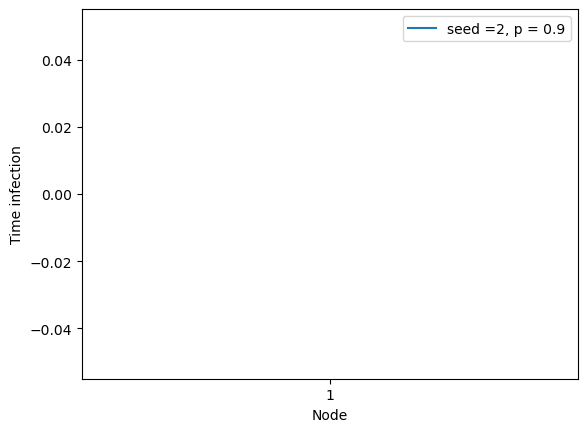

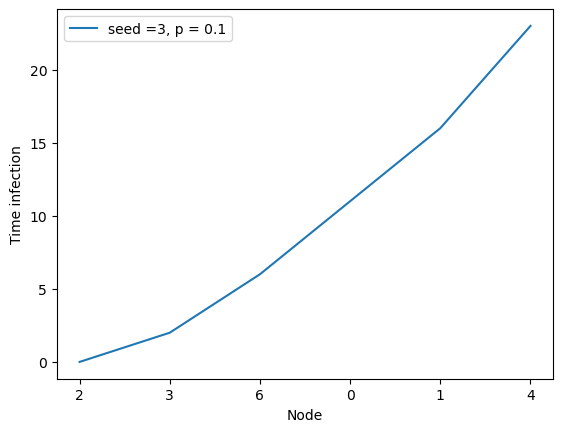

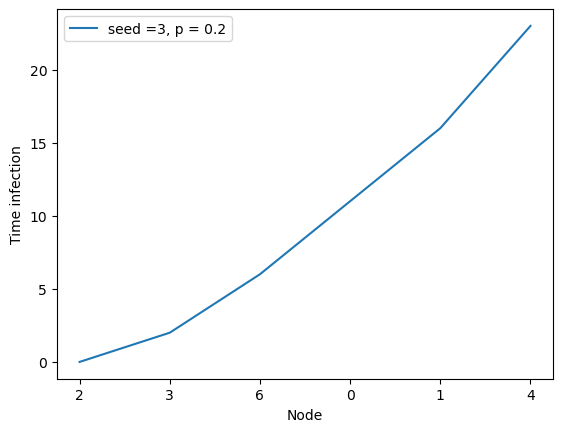

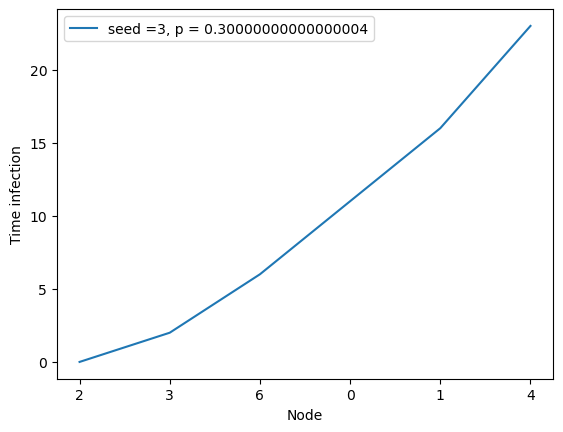

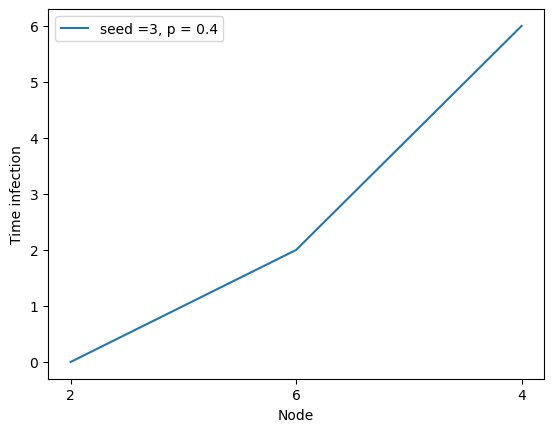

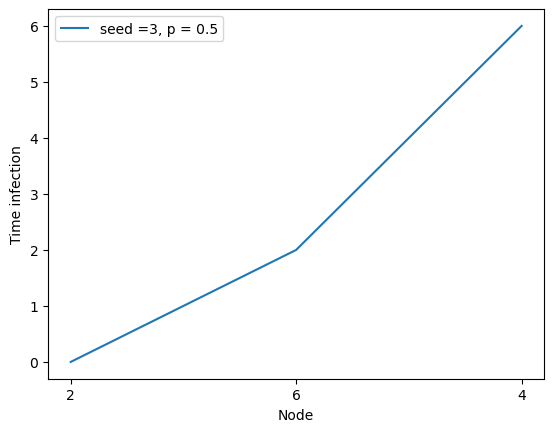

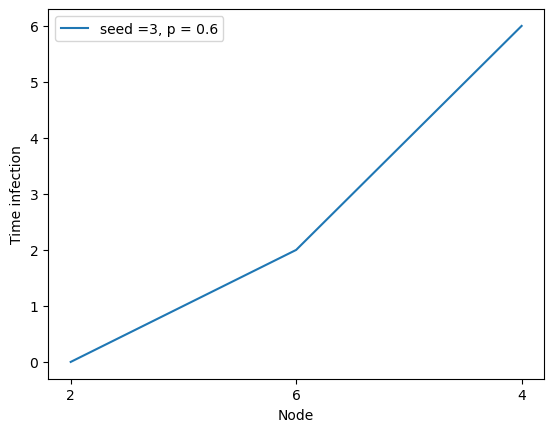

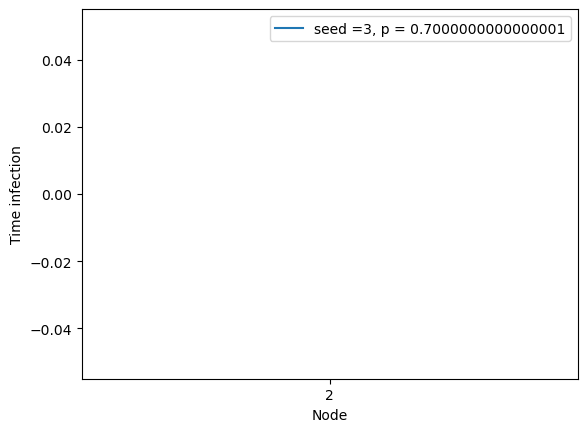

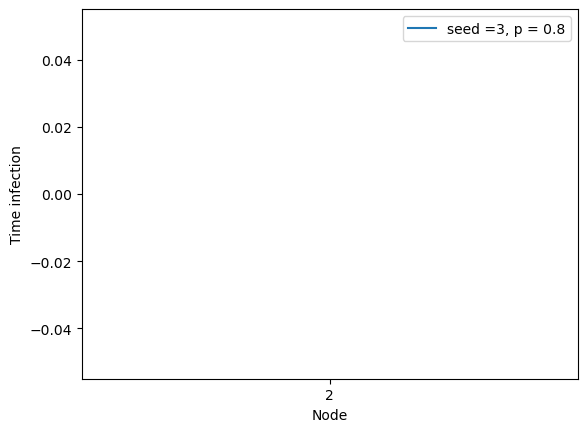

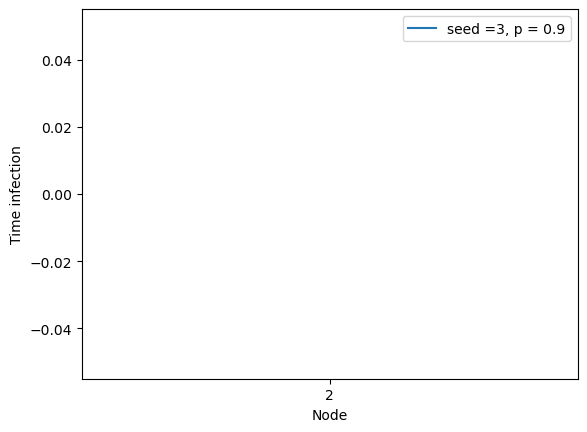

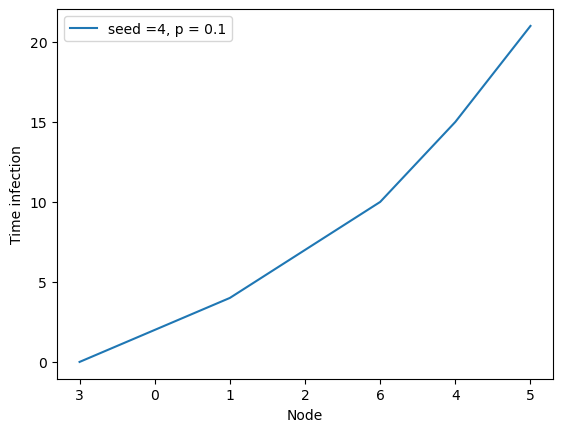

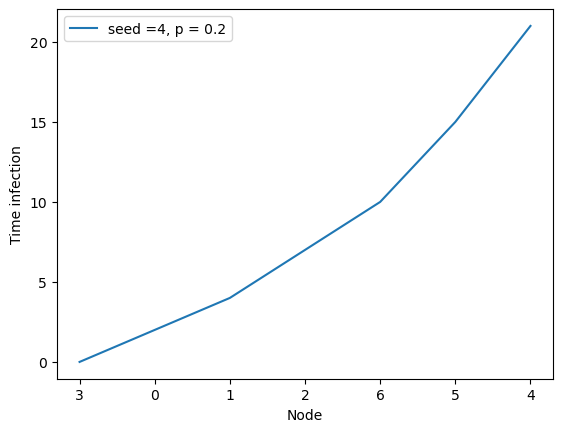

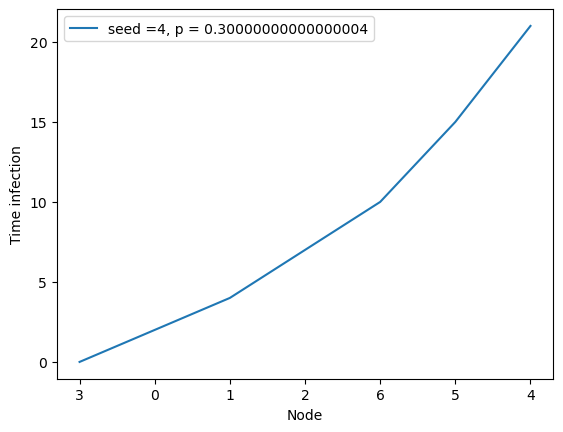

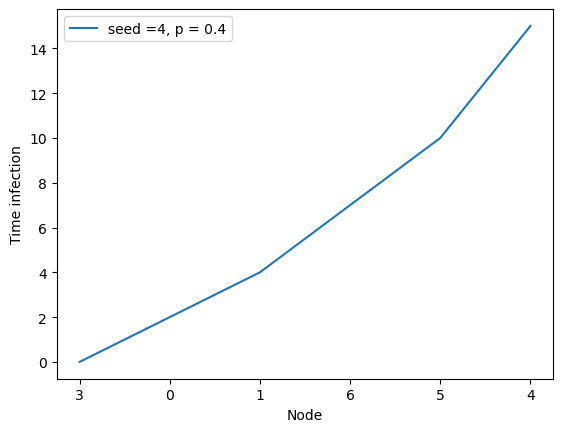

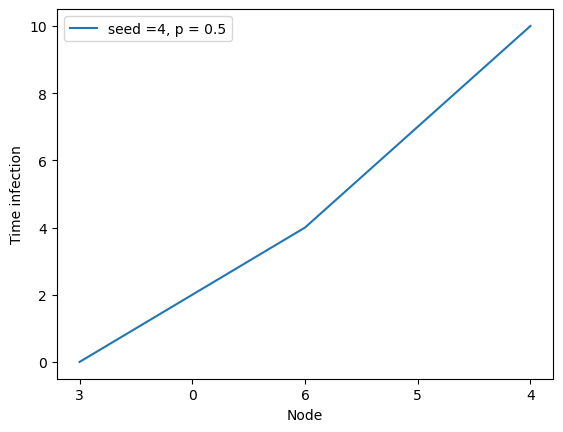

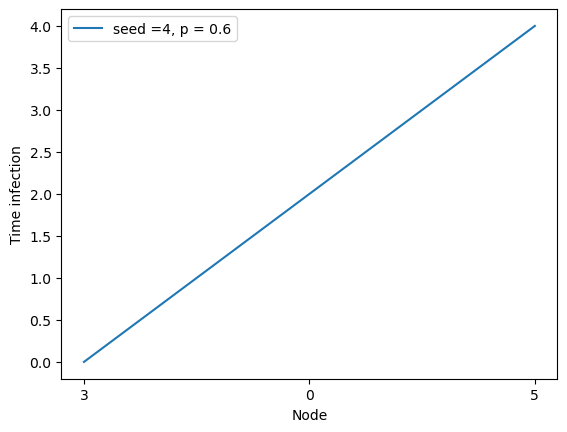

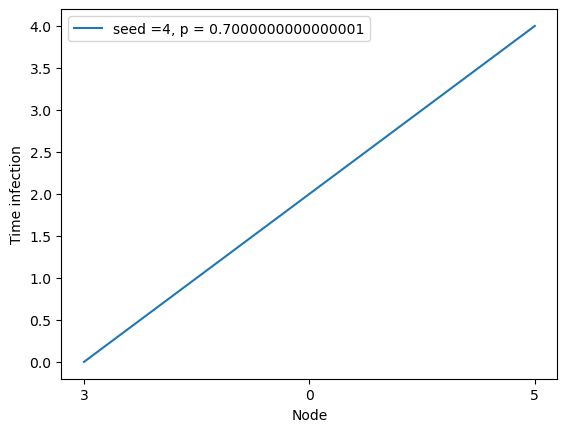

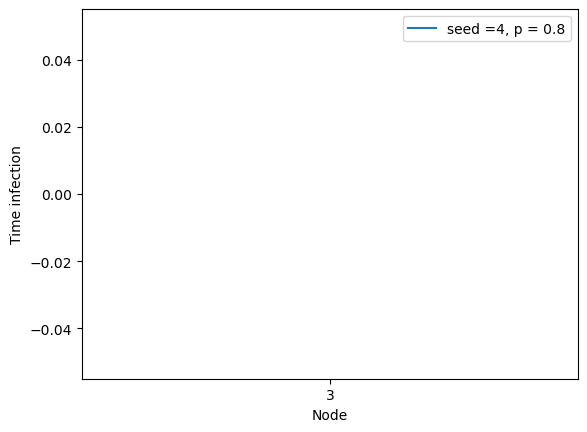

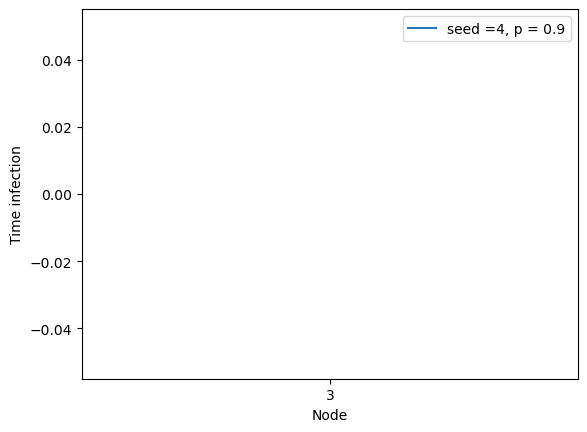

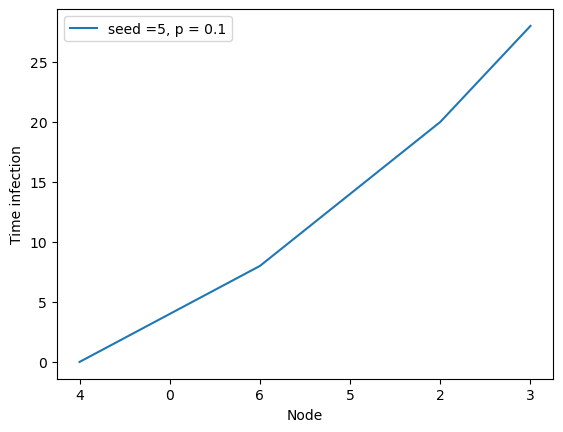

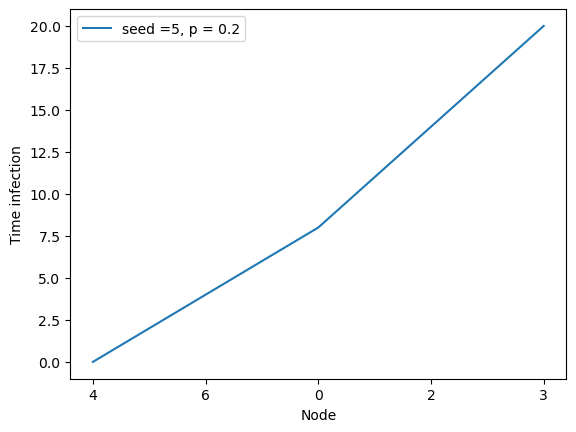

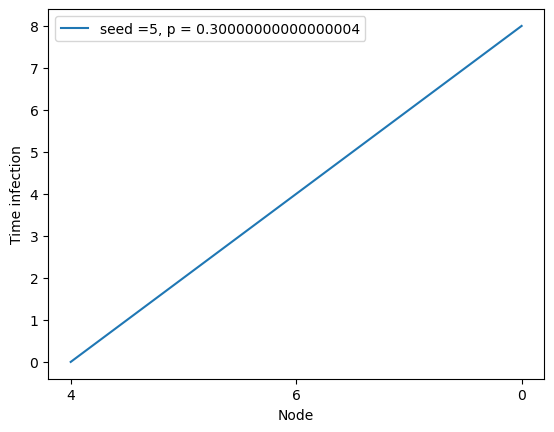

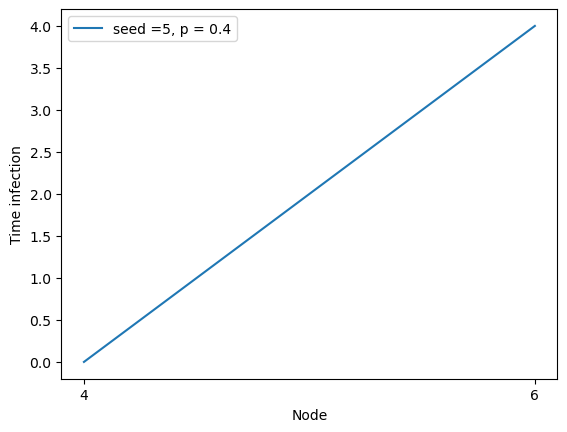

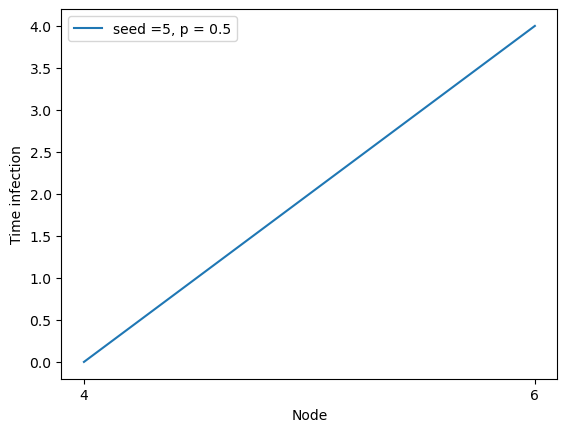

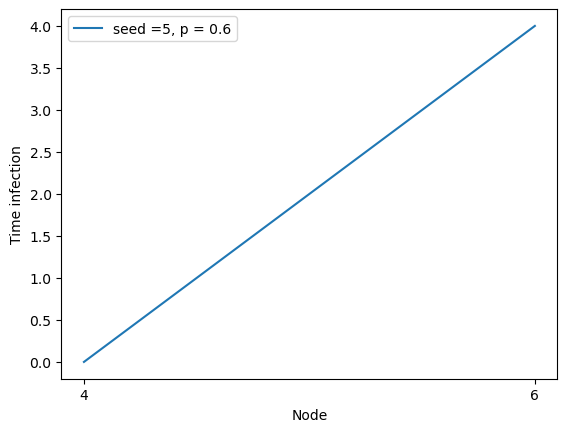

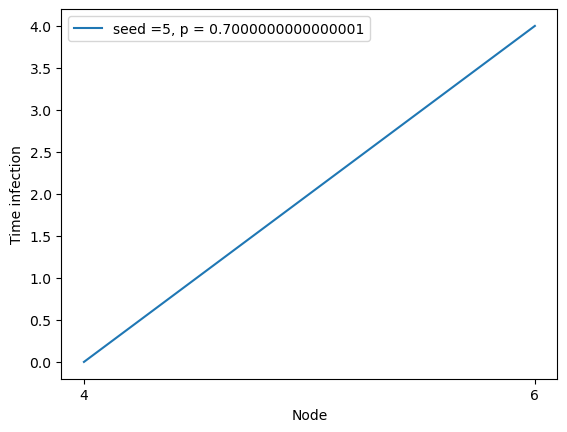

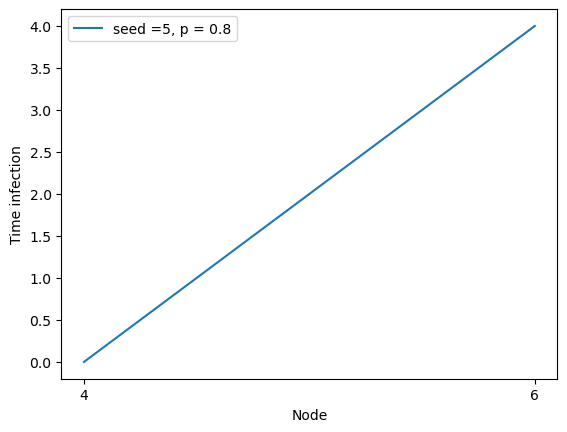

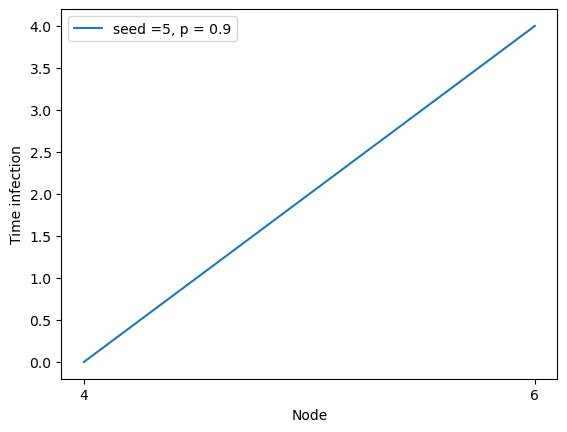

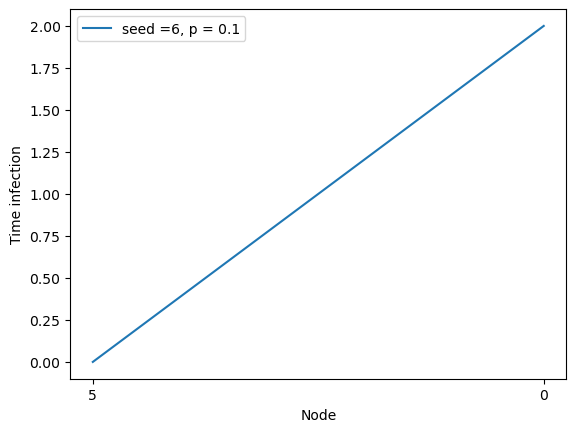

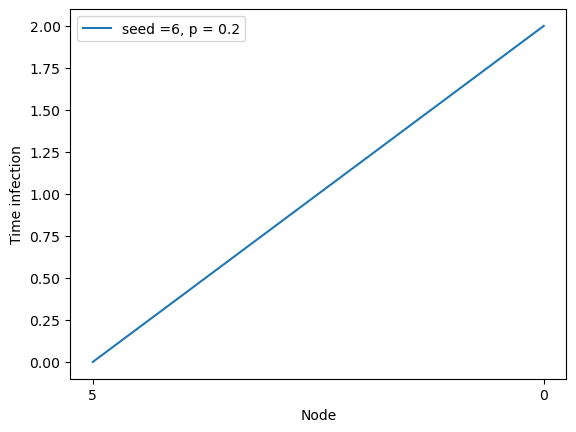

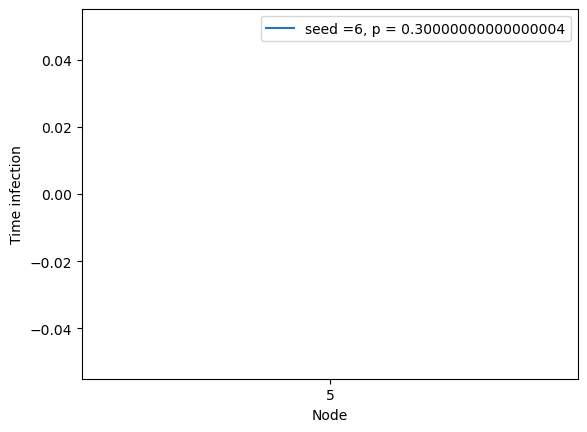

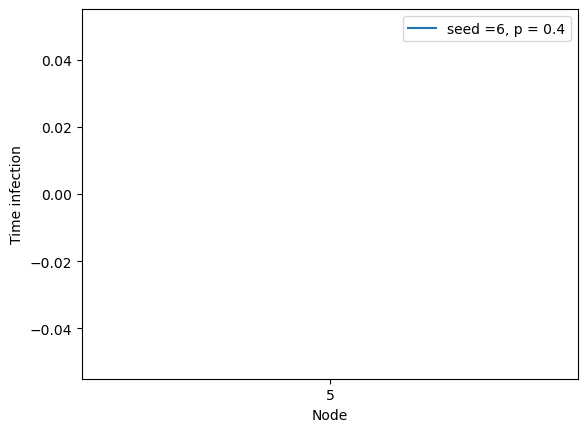

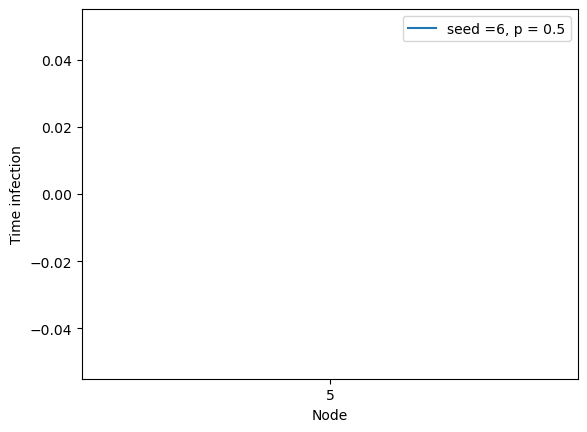

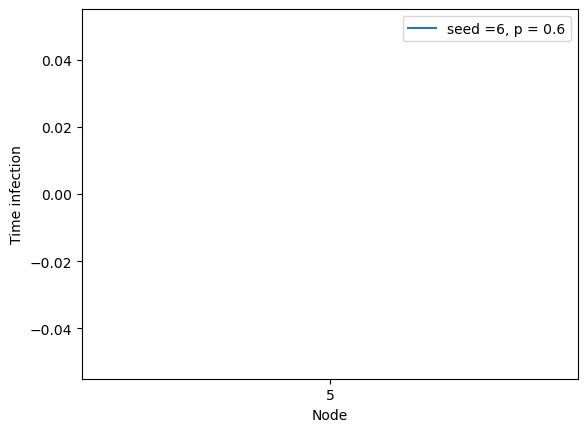

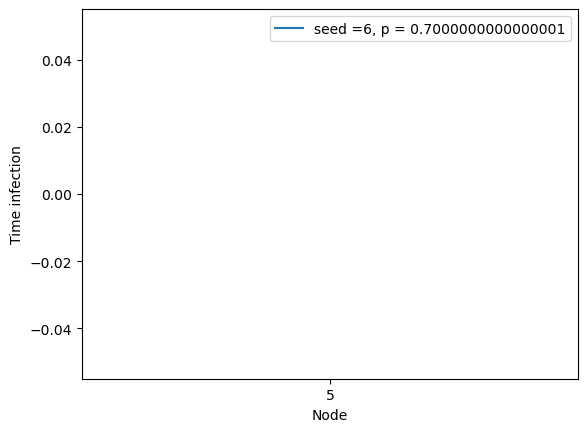

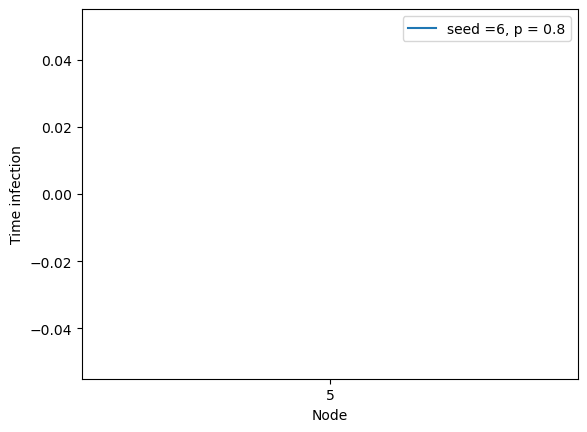

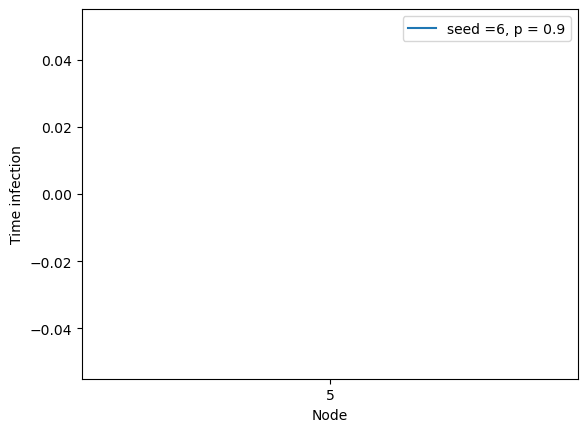

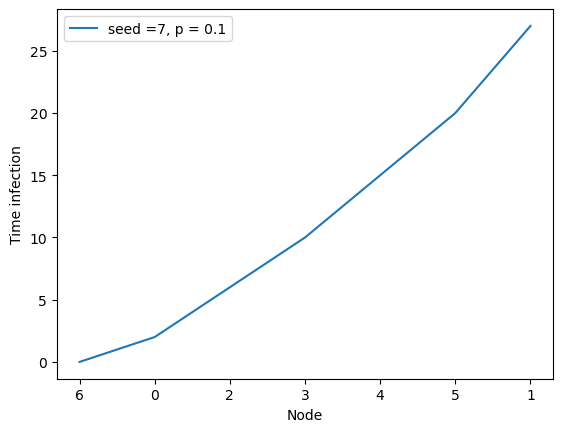

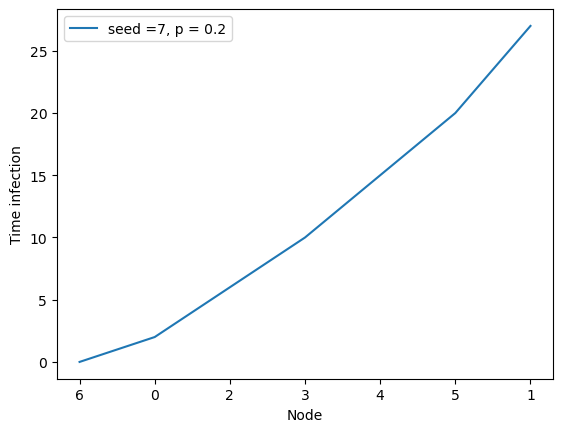

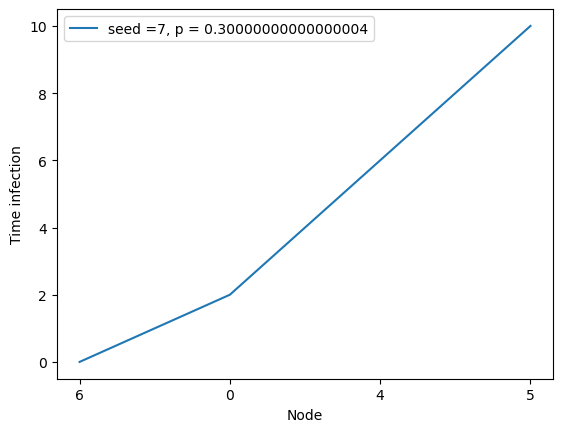

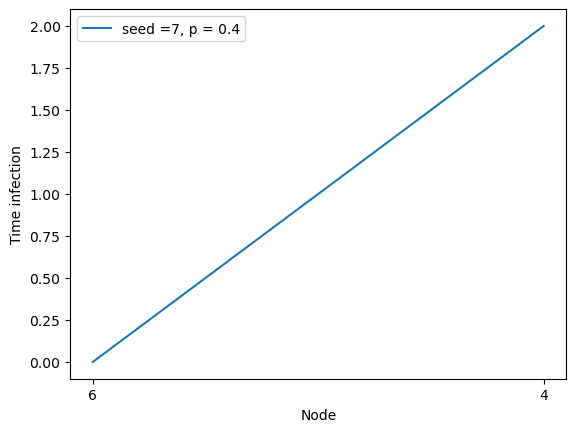

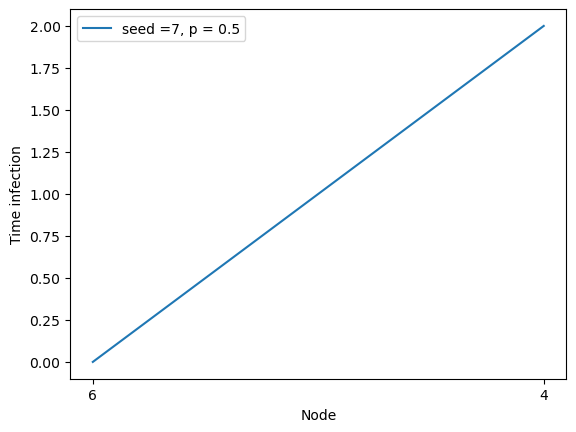

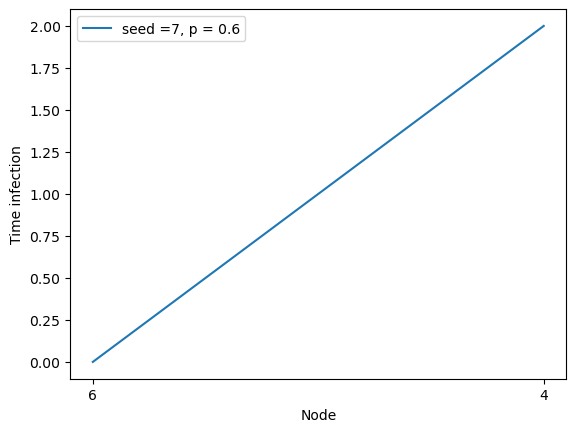

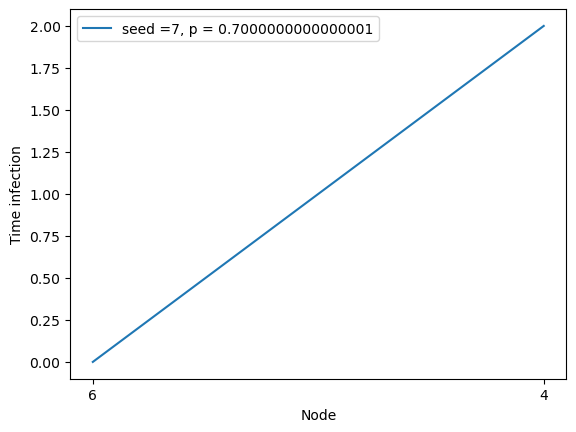

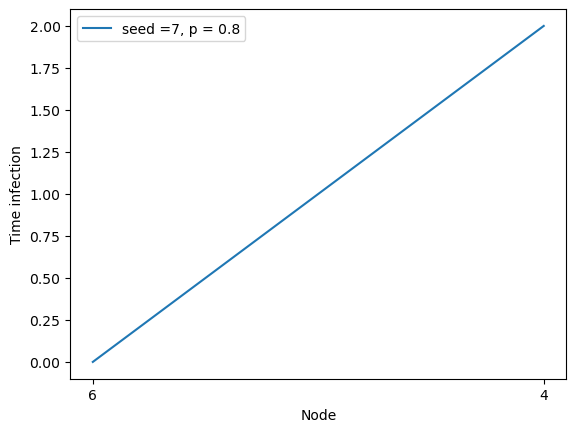

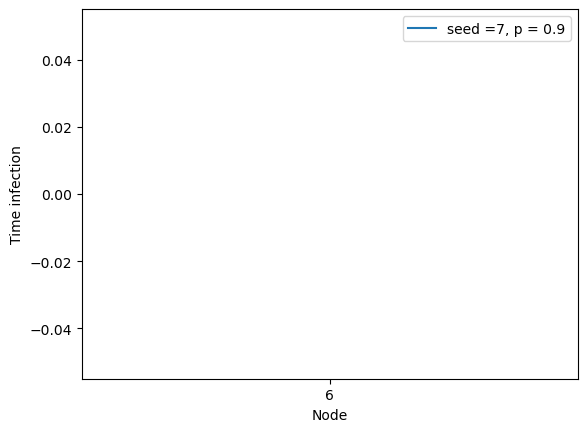

In [152]:

for seed in np.arange(1, 8, 1):
   
    seed_node = seed
    times_matrix = nx.adjacency_matrix(G, weight='weight').todense()
    shortest_paths = nx.shortest_path_length(G, source=seed_node, weight='weight')

    infect_array = infection_matrix(G)
    track_nodes = update_time(times_matrix, seed_node)
    for f in np.arange(0.1, 1.0, 0.1):

        
        infection_array = infection(f, track_nodes, prob_array, infect_array)
        times_array, track_array, accumulated_times  = update_time_prob(times_matrix, infection_array, seed_node)

        #
        acc_times = list(accumulated_times.values())
        
        if len(track_array > 1):
            
            x_values = track_array
            #print("x_values ", x_values)
            y_values = acc_times
            #print("y_values ", y_values)


            nodes, time = match_array_lengths(x_values, y_values)
            #print("nodes ", nodes)
            #print("time ", time)


            x_values_string = nodes.astype(str)



            # Plotting the line plot
            plt.plot(x_values_string, time, label='seed ={}, p = {}'.format(seed, f))
            
        else:
            pass

        # Adding labels to the axes
        plt.xlabel('Node')
        plt.ylabel('Time infection')

        # Adding a title to the plot
        #plt.title('Line Plot Example')

        # Adding a legend
        plt.legend()

        # Display the plot
        plt.show()
